Part 1: Regression on California Test Scores

Find the url for the California Test Score Data Set from the following website:

https://vincentarelbundock.github.io/Rdatasets/datasets.html

Read through the "DOC" file to understand the variables in the dataset, then use the following url to import the data.  

https://vincentarelbundock.github.io/Rdatasets/csv/Ecdat/Caschool.csv

The target data (i.e. the dependent variable) is named "testscr".  You can use all  variables in the data except for "readscr" and "mathscr" in the following analysis.  (These two variables were used to generate the dependent variable).


In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/Ecdat/Caschool.csv")
df.head(5)


,rownames,distcod,county,district,grspan,enrltot,teachers,calwpct,mealpct,computer,testscr,compstu,expnstu,str,avginc,elpct,readscr,mathscr
0,1,75119,Alameda,Sunol Glen Unified,KK-08,195,10.900000,0.510200,2.040800,67,690.799988,0.343590,6384.911133,17.889910,22.690001,0.000000,691.599976,690.000000
1,2,61499,Butte,Manzanita Elementary,KK-08,240,11.150000,15.416700,47.916698,101,661.200012,0.420833,5099.380859,21.524664,9.824000,4.583333,660.500000,661.900024
2,3,61549,Butte,Thermalito Union Elementary,KK-08,1550,82.900002,55.032299,76.322601,169,643.599976,0.109032,5501.954590,18.697226,8.978000,30.000002,636.299988,650.900024
3,4,61457,Butte,Golden Feather Union Elementary,KK-08,243,14.000000,36.475399,77.049202,85,647.700012,0.349794,7101.831055,17.357143,8.978000,0.000000,651.900024,643.500000
4,5,61523,Butte,Palermo Union Elementary,KK-08,1335,71.500000,33.108601,78.427002,171,640.849976,0.128090,5235.987793,18.671329,9.080333,13.857677,641.799988,639.900024


1.1 Visualize the univariate distribution of the target feature and each of the three continuous explanatory variables that you think are likely to have a relationship with the target feature.   

Text(0, 0.5, 'testscr')

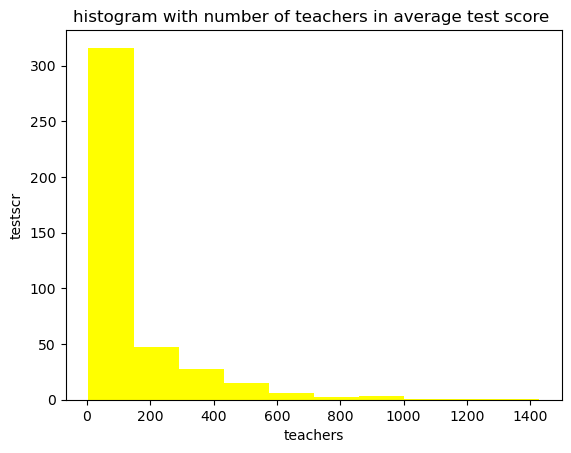

In [3]:
# pick three continuous variables : teachers

plt.hist(df['teachers'], color = 'yellow')
plt.title('histogram with number of teachers in average test score ')
plt.xlabel('teachers')
plt.ylabel('testscr')

Text(0, 0.5, 'testscr')

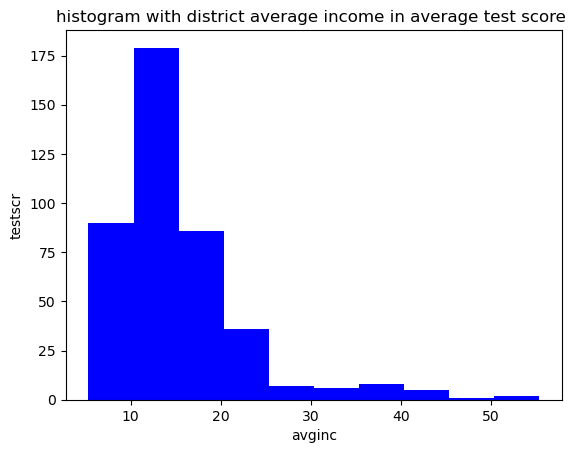

In [4]:
# avginc 
plt.hist(df['avginc'], color = 'blue')
plt.title('histogram with district average income in average test score ')
plt.xlabel('avginc')
plt.ylabel('testscr')

Text(0, 0.5, 'testscr')

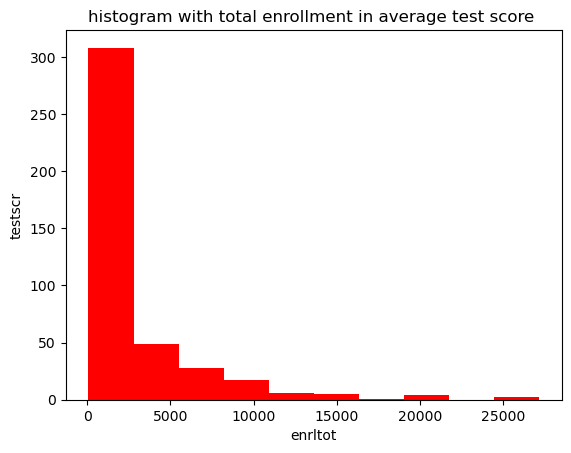

In [5]:
# enrltot
plt.hist(df['enrltot'], color = 'red')
plt.title('histogram with total enrollment in average test score ')
plt.xlabel('enrltot')
plt.ylabel('testscr')

1.2 Visualize the dependency of the target on each feature from 1.1.

Text(0, 0.5, 'testscr')

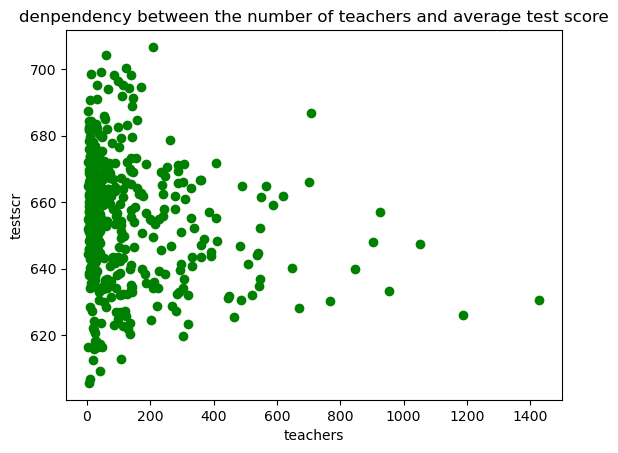

In [6]:
plt.scatter(df['teachers'], df['testscr'], color = 'green')
plt.title('denpendency between the number of teachers and average test score')
plt.xlabel('teachers')
plt.ylabel('testscr')

Text(0, 0.5, 'testscr')

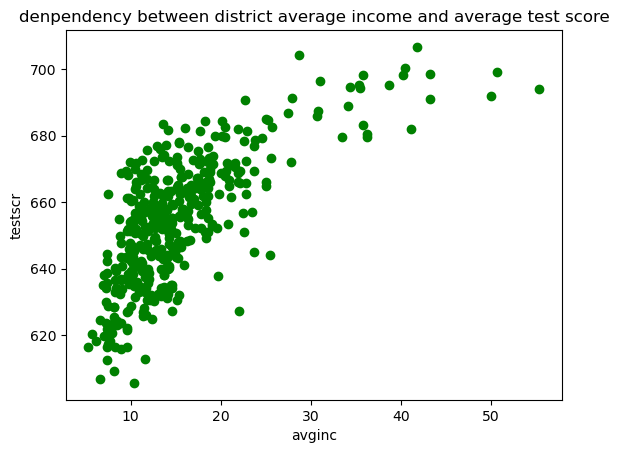

In [7]:
plt.scatter(df['avginc'], df['testscr'], color = 'green')
plt.title('denpendency between district average income and average test score')
plt.xlabel('avginc')
plt.ylabel('testscr')

Text(0, 0.5, 'testscr')

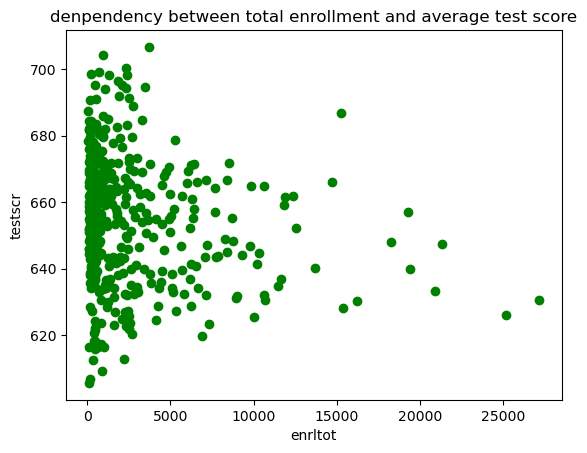

In [8]:
plt.scatter(df['enrltot'], df['testscr'], color = 'green')
plt.title('denpendency between total enrollment and average test score')
plt.xlabel('enrltot')
plt.ylabel('testscr')

1.3 Split data in training and test set. Build models that evaluate the relationship between all available X variables in the California test dataset and the target variable. Evaluate KNN for regression, Linear Regression (OLS), Ridge, and Lasso using cross-validation with the default parameters. Does scaling the data with the StandardScaler help?

In [9]:
# clean up data and set up 
y = df['testscr']
X = df.loc[:, ~df.columns.isin (['rownames','distcod','testscr', 'readscr', 'mathscr','district','grspan','county'])]
# drop all categorical variables and is not continuous

print(y[0:5])
X.head()

0    690.799988
1    661.200012
2    643.599976
3    647.700012
4    640.849976
Name: testscr, dtype: float64


,enrltot,teachers,calwpct,mealpct,computer,compstu,expnstu,str,avginc,elpct
0,195,10.900000,0.510200,2.040800,67,0.343590,6384.911133,17.889910,22.690001,0.000000
1,240,11.150000,15.416700,47.916698,101,0.420833,5099.380859,21.524664,9.824000,4.583333
2,1550,82.900002,55.032299,76.322601,169,0.109032,5501.954590,18.697226,8.978000,30.000002
3,243,14.000000,36.475399,77.049202,85,0.349794,7101.831055,17.357143,8.978000,0.000000
4,1335,71.500000,33.108601,78.427002,171,0.128090,5235.987793,18.671329,9.080333,13.857677


In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

X_train.head()

,enrltot,teachers,calwpct,mealpct,computer,compstu,expnstu,str,avginc,elpct
3,243,14.000000,36.475399,77.049202,85,0.349794,7101.831055,17.357143,8.978000,0.000000
18,6880,303.029999,21.282400,94.971199,960,0.139535,5064.615723,22.704023,7.022000,77.005814
393,141,6.910000,10.071900,9.352500,44,0.312057,6060.256836,20.405210,20.089001,0.000000
60,723,37.119999,25.921101,83.157898,45,0.062241,4692.493652,19.477371,8.279000,36.929462
203,307,15.850000,5.537500,28.664499,36,0.117264,4718.163086,19.369085,14.578000,7.491857


In [11]:
#KNN for regression

from sklearn.neighbors import KNeighborsRegressor
#train model with k = 5
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

accuracy = knn.score(X_test, y_test)
print("Accuracy: {:.2f}".format(accuracy))


Accuracy: 0.08


In [12]:
knn = KNeighborsRegressor(n_neighbors=7)
knn.fit(X_train, y_train)
#train model with k = 7

accuracy = knn.score(X_test, y_test)
print("Accuracy: {:.2f}".format(accuracy))

Accuracy: 0.07


In [13]:
#import cross validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold

kfold = KFold(n_splits = 5)
rkf = RepeatedKFold(n_splits = 5, n_repeats = 10)

print("KFlod: "+str(cross_val_score(KNeighborsRegressor(n_neighbors=4), X_train, y_train, cv=kfold).mean()))
print("RepeatedKFold:\n{}".format(cross_val_score(KNeighborsRegressor(n_neighbors=5), X_train, y_train, cv=rkf).mean()))
print("KFlod: "+str(cross_val_score(KNeighborsRegressor(n_neighbors=4), X_train, y_train, cv=kfold)))

KFlod: -0.10344885260758066
RepeatedKFold:
-0.0937270462079776
KFlod: [-0.33553657 -0.0560609  -0.08727311 -0.12071835  0.08234467]


In [14]:
#OLS
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

lr = LinearRegression()
lr.fit(X_train, y_train)

print(X_train.columns)  
print("lr.coef_: "+str(lr.coef_))  
print("lr.intercept_: {}".format(lr.intercept_))

Index(['enrltot', 'teachers', 'calwpct', 'mealpct', 'computer', 'compstu',
       'expnstu', 'str', 'avginc', 'elpct'],
      dtype='object')
lr.coef_: [ 2.37299343e-04 -9.68465212e-03 -1.05122232e-01 -3.63632211e-01
  2.23981150e-03 -1.50110373e+00  1.87297506e-03 -3.68530746e-01
  5.17180694e-01 -1.97462843e-01]
lr.intercept_: 664.1994881014359


In [15]:
from sklearn.model_selection import cross_val_score

print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

print(np.mean(cross_val_score(LinearRegression(), X_train, y_train, cv=kfold, scoring="r2")))

#no difference

Training set score: 0.81
Test set score: 0.81
0.7807020742805936


In [16]:
import statsmodels.api as sm

X_train_new = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_new).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                testscr   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     125.9
Date:                Tue, 10 Oct 2023   Prob (F-statistic):          8.50e-102
Time:                        23:05:02   Log-Likelihood:                -1098.5
No. Observations:                 315   AIC:                             2219.
Df Residuals:                     304   BIC:                             2260.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        664.1995     10.920     60.823      0.000     642.711     685.688
enrltot        0.0002      0.002      0.138      0.890      -0.003       0.004
teachers      -0.0097      0.038     -0.253      0.800      -0.085       0.066
calwpct       -0.1051      0.068     -1.548      0.123      -0.239       0.028
mealpct       -0.3636      0.042     -8.752      0.000      -0.445      -0.282
computer       0.0022      0.003      0.689      0.492      -0.004       0.009
compstu       -1.5011      8.516     -0.176      0.860     -18.258      15.256
expnstu        0.0019      0.001      1.897      0.059   -6.97e-05       0.004
str           -0.3685      0.367     -1.005      0.316      -1.090       0.353
avginc         0.5172      0.096      5.372      0.000       0.328       0.707
elpct         -0.1975      0.042     -4.716      0.000      -0.280      -0.115
==============================================================================
Omnibus:                        1.367   Durbin-Watson:                   1.867
Prob(Omnibus):                  0.505   Jarque-Bera (JB):                1.145
Skew:                           0.020   Prob(JB):                        0.564
Kurtosis:                       3.293   Cond. No.                     1.58e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.58e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
# ridge regression

from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)
print("1Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("1Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

# or (with default parameter)

ridge1 = Ridge(alpha=1).fit(X_train, y_train)
print("2Training set score: {:.2f}".format(ridge1.score(X_train, y_train)))
print("2Test set score: {:.2f}".format(ridge1.score(X_test, y_test)))

print(X_train.columns)  
print("ridge.coef_: {}".format(ridge.coef_))
print("ridge.intercept_: {}".format(ridge.intercept_))
#no difference

1Training set score: 0.81
1Test set score: 0.81
2Training set score: 0.81
2Test set score: 0.81
Index(['enrltot', 'teachers', 'calwpct', 'mealpct', 'computer', 'compstu',
       'expnstu', 'str', 'avginc', 'elpct'],
      dtype='object')
ridge.coef_: [ 2.16651495e-04 -8.94419019e-03 -1.04514474e-01 -3.63985541e-01
  2.10678551e-03 -7.07149871e-01  1.86261011e-03 -3.61969722e-01
  5.16732038e-01 -1.96932369e-01]
ridge.intercept_: 664.0227418164893


In [18]:
# Lasso regression

from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train, y_train)

print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

print(X_train.columns)  
print("lasso.coef_: {}".format(lasso.coef_))


Training set score: 0.80
Test set score: 0.81
Number of features used: 8
Index(['enrltot', 'teachers', 'calwpct', 'mealpct', 'computer', 'compstu',
       'expnstu', 'str', 'avginc', 'elpct'],
      dtype='object')
lasso.coef_: [-3.49584411e-04  2.48458337e-03 -8.87553845e-02 -3.79258646e-01
  1.92100909e-03  0.00000000e+00  2.48224777e-03 -0.00000000e+00
  4.81690728e-01 -1.86583901e-01]


/Users/yemei/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.132e+01, tolerance: 1.014e+01
  model = cd_fast.enet_coordinate_descent(


In [19]:
# or 

lasso1 = Lasso(alpha=1, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso1.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso1.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

Training set score: 0.80
Test set score: 0.81
Number of features used: 8


In [20]:
np.sum(lasso.coef_!=0)

8

In [21]:
# adding standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# for knn regression 
#if k=5 in scaled data
knn = KNeighborsRegressor(n_neighbors=5)   
knn.fit(X_train_scaled, y_train)
accuracy = knn.score(X_test_scaled, y_test)

print("Accuracy:", accuracy)

Accuracy: 0.7689310586146225


In [22]:
# if k=3 in scaled data
knn = KNeighborsRegressor(n_neighbors=3)   
knn.fit(X_train_scaled, y_train)
accuracy = knn.score(X_test_scaled, y_test)

print("Accuracy:", accuracy)

Accuracy: 0.74488944228209


In [23]:
# for linear regression

lr.fit(X_train_scaled, y_train)
train_score = lr.score(X_train_scaled, y_train)
test_score = lr.score(X_test_scaled, y_test)

print("Training set score: {:.2f}".format(train_score))
print("Test set score: {:.2f}".format(test_score))

Training set score: 0.81
Test set score: 0.81


In [24]:
# for ridge regression

ridge = Ridge().fit(X_train_scaled, y_train)

print("1Training set score: {:.2f}".format(ridge.score(X_train_scaled, y_train)))
print("1Test set score: {:.2f}".format(ridge.score(X_test_scaled, y_test)))

1Training set score: 0.81
1Test set score: 0.81


In [25]:
# for lasso regression

lasso = Lasso().fit(X_train_scaled, y_train)

print("Training set score: {:.2f}".format(lasso.score(X_train_scaled, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test_scaled, y_test)))

Training set score: 0.80
Test set score: 0.79


overall, scaling date with the standardscaled improved the training set score and test set score linear regression model and ridge regression, as well as the accuracy in knn regression model. 

1.4 Tune the parameters of the models where possible using GridSearchCV. Do the results improve?

In [26]:
from sklearn.model_selection import GridSearchCV

#for knn regression
param_grid = {'n_neighbors': [1, 3, 5, 7, 9, 10, 11, 13]}
grid = GridSearchCV(KNeighborsRegressor(), param_grid = param_grid, cv=kfold)
grid.fit(X_train, y_train)

print("Best mean cross-validation score:{: 2f}".format(grid.best_score_))
print("Best parameters: {}".format(grid.best_params_))
print("test-set score: {:.2f}".format(grid.score(X_test, y_test)))

#model overfitting 

Best mean cross-validation score: 0.026638
Best parameters: {'n_neighbors': 13}
test-set score: 0.03


In [27]:
# for ridge

param_grid = {'alpha': [0.01, 1, 5, 10, 20, 50, 100]}
gridr = GridSearchCV(Ridge(), param_grid = param_grid, cv=kfold)
gridr.fit(X_train, y_train)

print("Best mean cross-validation score:{: 2f}".format(gridr.best_score_))
print("Best parameters: {}".format(gridr.best_params_))
print("test-set score: {:.2f}".format(gridr.score(X_test, y_test)))

#make more accurate prediction on new unseen data 

Best mean cross-validation score: 0.784649
Best parameters: {'alpha': 100}
test-set score: 0.81


In [28]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("3Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("3Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("4Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("4Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))


3Training set score: 0.81
3Test set score: 0.81
4Training set score: 0.81
4Test set score: 0.81


In [29]:
# for lasso

param_grid = {'alpha': [0.01, 1, 5, 10, 20, 50, 100]}
gridl = GridSearchCV(Lasso(), param_grid = param_grid, cv=kfold)
gridl.fit(X_train, y_train)

print("Best mean cross-validation score:{: 2f}".format(gridl.best_score_))
print("Best parameters: {}".format(gridl.best_params_))
print("test-set score: {:.2f}".format(gridl.score(X_test, y_test)))

/Users/yemei/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.369e+03, tolerance: 8.293e+00
  model = cd_fast.enet_coordinate_descent(
/Users/yemei/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.828e+03, tolerance: 8.121e+00
  model = cd_fast.enet_coordinate_descent(
/Users/yemei/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duali

Best mean cross-validation score: 0.787589
Best parameters: {'alpha': 5}
test-set score: 0.80


In [30]:
lasso001 = Lasso(alpha=0.001, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0)))


Training set score: 0.81
Test set score: 0.81
Number of features used: 10


The result improved that we are able to ensure that the mode's performance genelized well to unseen data. Particularly, we can get the result of best mean cross-validation score to better identify whether the model is overfitting or not. 

1.5 Compare the coefficients of your two best linear models (not knn), do they agree on which features are important?

In my opinion, the two best linear models are linear regression (OLS) and ridge.
The below lists two best linear models detailed coefficients.

(abstracted from above running result)
linear regression:
'enrltot','teachers','calwpct','mealpct','computer','compstu','expnstu','str','avginc','elpct
2.37299343e-04, -9.68465212e-03, -1.05122232e-01, -3.63632211e-01, 2.23981150e-03, -1.50110373e+00, 1.87297506e-03, -3.68530746e-01, 5.17180694e-01, -1.97462843e-01

ridge
'enrltot', 'teachers', 'calwpct', 'mealpct', 'computer', 'compstu','expnstu', 'str', 'avginc', 'elpct']
2.16651495e-04, -8.94419019e-03, -1.04514474e-01, -3.63985541e-01, 2.10678551e-03, -7.07149871e-01,  1.86261011e-03, -3.61969722e-01, 5.16732038e-01, -1.96932369e-01


Each variable's coefficient in ridge and OLS have similar results that they both agree, teachers and avginc, are important variables need to look at in their model. Ridge model also indicated the variable 'compstu' are important to consider in the model. 

1.6 Now that you have experimented with different models, discuss which final model you would choose to predict new data

Overall, I would choose to use ridge model as the final model to predict the new data. First, ridge model is underfitting. The model with selected hyperparameters('alpha =100) will perform well in cross validation and on the test dataset. The test-set score of 0.81 shows the model is better than lasso model with the score of 0.80. Also, in terms of question 1.5, ridge model tell us better of what variables should be consider.

Part 2: Classification on red and white wine characteristics

First, import the red and the white wine csv files into separate pandas dataframes from the following website:

The data frame for the red wine, please use: "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"

The data frame for the white wine, please use: "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"

(Note: you need to adjust the argument for read_csv() from sep=',' to sep=';')

Add a new column to each data frame called "winetype".  For the white wine dataset label the values in this column with a 0, indicating white wine.  For the red wine dataset, label values with a 1, indicating red wine.  Combine both datasets into a single dataframe.

The target data (i.e. the dependent variable) is "winetype".

In [31]:
# read file

df_red = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=";")
df_red.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [32]:
# add new column for red as 1
df_red['winetype'] = 1
print(df_red.head(5))

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  winetype  
0      9.4        5         1  
1      9.8        5   

In [33]:
df_white = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep=";")
df_white.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [34]:
# add new column for white as 0
df_white['winetype'] = 0
print(df_white.head(5))

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  winetype  
0      8.8        6         0  
1      9.5        6   

In [35]:
# combine two dataset to one
df = pd.concat([df_red, df_white], ignore_index=True)
print(df)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.70         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
6492            6.2              0.21         0.29             1.6      0.039   
6493            6.6              0.32         0.36             8.0      0.047   
6494            6.5              0.24         0.19             1.2      0.041   
6495            5.5              0.29         0.30             1.1      0.022   
6496            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  

2.1 Visualize the univariate distribution of the target feature and each of the three explanatory variables that you think are likely to have a relationship with the target feature.   

Text(0, 0.5, 'winetype')

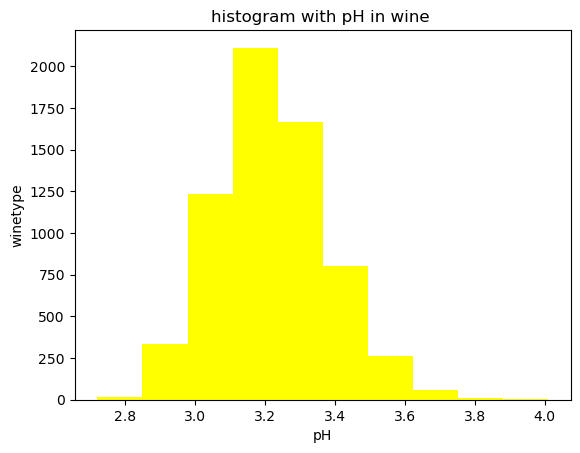

In [36]:
# pick three continuous variables : pH

plt.hist(df['pH'], color = 'yellow')
plt.title('histogram with pH in wine ')
plt.xlabel('pH')
plt.ylabel('winetype')

Text(0, 0.5, 'winetype')

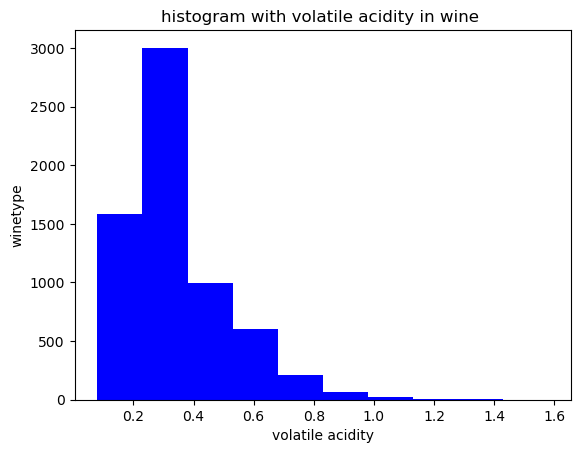

In [37]:
plt.hist(df['volatile acidity'], color = 'blue')
plt.title('histogram with volatile acidity in wine ')
plt.xlabel('volatile acidity')
plt.ylabel('winetype')

Text(0, 0.5, 'winetype')

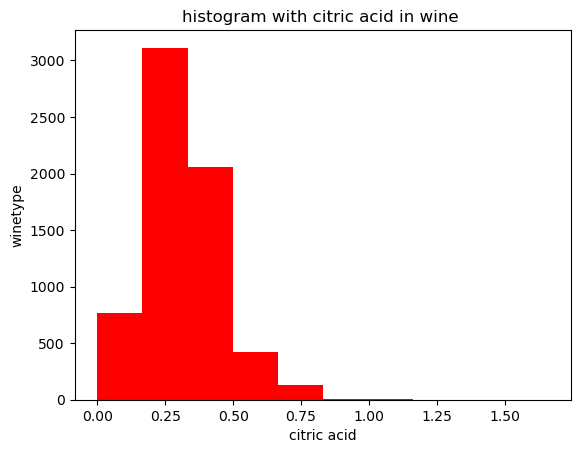

In [38]:
plt.hist(df['citric acid'], color = 'red')
plt.title('histogram with citric acid in wine ')
plt.xlabel('citric acid')
plt.ylabel('winetype')


2.2 Split data into training and test set. Build models that evaluate the relationship between all available X variables in the dataset and the target variable. Evaluate Logistic Regression, Penalized Logistic Regression, and KNN for classification using cross-validation. How different are the results? How does scaling the data with StandardScaler influence the results?

In [39]:
#clean data 
y = df['winetype']
X = df.loc[:, df.columns != 'winetype']
print(y[0:5])
X.head()

0    1
1    1
2    1
3    1
4    1
Name: winetype, dtype: int64


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [40]:
# train test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)


#logistic regression

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(penalty='none').fit(X_train, y_train)

print(X_train.columns)
print("logreg.coef_: {}".format(logreg.coef_))

print("Training set score: {:.2f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.2f}".format(logreg.score(X_test, y_test)))

predicted_vals = logreg.predict(X_test)
print("logreg.predict: {}".format(predicted_vals))


Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')
logreg.coef_: [[ 0.87261898 14.67418382 -2.38059767 -0.20913121  2.49355492  0.07185005
  -0.08065828 -2.93971579  1.26623909 12.23021875 -1.09144806  0.04497667]]
Training set score: 0.98
Test set score: 0.98
logreg.predict: [0 0 0 ... 0 0 0]


/Users/yemei/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/yemei/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [41]:
#Penalized Logistic Regression
#set penalty l2, C=1

logreg = LogisticRegression(C=1, penalty='l2').fit(X_train, y_train)

print(X_train.columns)
print("logreg.coef_: {}".format(logreg.coef_))

print("Training set score: {:.2f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.2f}".format(logreg.score(X_test, y_test)))

predicted_vals = logreg.predict(X_test)
print("logreg.predict: {}".format(predicted_vals))

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')
logreg.coef_: [[ 0.69627317  8.33694402 -1.57429733 -0.16835471  1.33919151  0.04804126
  -0.06493072 -1.37262812  1.38874047  6.76858419 -0.83141084 -0.0653374 ]]
Training set score: 0.98
Test set score: 0.97
logreg.predict: [0 0 0 ... 0 0 0]


/Users/yemei/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [42]:
#set penalty l1, C=1 
logreg = LogisticRegression(C=1, penalty='l1', solver='liblinear').fit(X_train, y_train)

print(X_train.columns)
print("logreg.coef_: {}".format(logreg.coef_))

print("Training set score: {:.2f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.2f}".format(logreg.score(X_test, y_test)))

predicted_vals = logreg.predict(X_test)
print("logreg.predict: {}".format(predicted_vals))

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')
logreg.coef_: [[ 9.64270167e-01  1.18004494e+01  0.00000000e+00 -1.55228715e-01
   1.56780904e+01  5.55695673e-02 -6.60055021e-02 -8.74098752e+00
   4.42336107e+00  8.82427126e+00 -6.88216483e-01  1.09219322e-04]]
Training set score: 0.99
Test set score: 0.98
logreg.predict: [0 0 0 ... 0 0 0]


In [43]:
# KNN for classification using cross-validation

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

print("knn score: {:.2f}".format(knn.score(X_test, y_test)))

knn score: 0.94


In [44]:
# cross validation for model evaluation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold

# Set up function parameters for different cross validation strategies
kfold = KFold(n_splits=5)
skfold = StratifiedKFold(n_splits=5, shuffle=True)
rkf = RepeatedKFold(n_splits=5, n_repeats=10)

print("KFold: "+str(cross_val_score(KNeighborsClassifier(n_neighbors=1), X_train, y_train, cv=kfold).mean()))

print("StratifiedKFold:\n{}".format(
cross_val_score(KNeighborsClassifier(n_neighbors=5), X_train, y_train, cv=skfold).mean()))

print("RepeatedKFold:\n{}".format(
cross_val_score(KNeighborsClassifier(n_neighbors=5), X_train, y_train,  cv=rkf).mean()))

KFold: 0.9404799663033749
StratifiedKFold:
0.9406821460538092
RepeatedKFold:
0.939572916337598


In [45]:
# add standardscaler

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# for knn regression 
#if k=5 in scaled data
knn = KNeighborsClassifier(n_neighbors=5)   
knn.fit(X_train_scaled, y_train)
accuracy = knn.score(X_test_scaled, y_test)

print("Accuracy:", accuracy)

Accuracy: 0.9889230769230769


In [46]:
# if k=1 

knn = KNeighborsClassifier(n_neighbors=1)   
knn.fit(X_train_scaled, y_train)
accuracy = knn.score(X_test_scaled, y_test)

print("Accuracy:", accuracy)

Accuracy: 0.9907692307692307


In [47]:
# for logistic regression

logreg = LogisticRegression(penalty='none').fit(X_train_scaled, y_train)

print("logreg.coef_: {}".format(logreg.coef_))

print("Training set score: {:.2f}".format(logreg.score(X_train_scaled, y_train)))
print("Test set score: {:.2f}".format(logreg.score(X_test_scaled, y_test)))

logreg.coef_: [[ 0.23593592  1.58974487 -0.28658209 -4.93808655  0.79248033  1.29840838
  -3.18179794  4.53207344  0.0204608   0.62839167  1.51230794  0.34655891]]
Training set score: 0.99
Test set score: 0.99


/Users/yemei/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


In [48]:
#Penalized Logistic Regression
#set penalty l2, C=1

logreg = LogisticRegression(C=1, penalty='l2').fit(X_train_scaled, y_train)

print("logreg.coef_: {}".format(logreg.coef_))

print("Training set score: {:.2f}".format(logreg.score(X_train_scaled, y_train)))
print("Test set score: {:.2f}".format(logreg.score(X_test_scaled, y_test)))

logreg.coef_: [[ 0.66799484  1.53089613 -0.28169198 -3.32824062  0.85778235  0.89842203
  -2.85276141  3.04102359  0.41924655  0.73896561  0.85589094  0.26665706]]
Training set score: 0.99
Test set score: 0.99


In [49]:
#set penalty l1, C=1 
logreg = LogisticRegression(C=1, penalty='l1', solver='liblinear').fit(X_train_scaled, y_train)

print("logreg.coef_: {}".format(logreg.coef_))

print("Training set score: {:.2f}".format(logreg.score(X_train_scaled, y_train)))
print("Test set score: {:.2f}".format(logreg.score(X_test_scaled, y_test)))

logreg.coef_: [[ 0.2374528   1.50256308 -0.24339199 -4.23906442  0.74467369  1.06486265
  -2.94839994  4.03511041  0.09157402  0.62515019  1.25755081  0.30811241]]
Training set score: 0.99
Test set score: 0.99



Each model is underfiting; the model presents a fairly high training set score and test set score, excepting knn accuracy score is a bit low relatively speaking. The difference I observed from the above model is each variance's coefficient that they are  not likly same in each model, especially they present different main influencing variables that should be considered. 

Scaling the data with standardscaler improved the score as well as the coeffient score between each variable. Therefore, it helps us to pick the best model as well as focus on more attention on key variables that need to be consider. 

2.3 Tune the parameters where possible using GridSearchCV. Do the results improve?

In [50]:
# grid search for knn

from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)


param_grid = {'n_neighbors': [1,3,5,7,9,10,11,13]} # parameter range 

grid = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, cv=10)

grid.fit(X_train, y_train)

#extract best score and parameter by calling objects "best_score_" and "best_params_"
print("best mean cross-validation score: {:.2f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))
print("test-set score: {:.2f}".format(grid.score(X_test, y_test)))


best mean cross-validation score: 0.95
best parameters: {'n_neighbors': 1}
test-set score: 0.95


In [51]:
# Logistic Regression

from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'penalty': ['l1','l2'], }

grid = GridSearchCV(LogisticRegression(), param_grid=param_grid, cv=10)
grid.fit(X_train, y_train)

#extract best score and parameter by calling objects "best_score_" and "best_params_"
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))
print("test-set score: {:.2f}".format(grid.score(X_test, y_test)))


/Users/yemei/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/yemei/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

/Users/yemei/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/yemei/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

/Users/yemei/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/yemei/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

best mean cross-validation score: 0.978
best parameters: {'C': 100, 'penalty': 'l2'}
test-set score: 0.98


/Users/yemei/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [52]:
# Penalized Logistic Regression

#set penalty l2, C=100
logreg = LogisticRegression(C=100, penalty='l2').fit(X_train, y_train)

print("logreg.coef_: {}".format(logreg.coef_))

print("Training set score: {:.2f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.2f}".format(logreg.score(X_test, y_test)))

predicted_vals = logreg.predict(X_test)
print("logreg.predict: {}".format(predicted_vals))

logreg.coef_: [[ 0.3532704   9.9762499  -2.07499912 -0.36936854  1.6598383   0.05935232
  -0.06803461 -1.54959329  1.93367645  7.96006843 -0.77021289 -0.10704297]]
Training set score: 0.98
Test set score: 0.98
logreg.predict: [0 0 1 ... 0 0 0]


/Users/yemei/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [53]:
# set l1 penalty when C=100

logreg = LogisticRegression(C=100, penalty='l1', solver='liblinear').fit(X_train, y_train)

print("logreg.coef_: {}".format(logreg.coef_))

print("Training set score: {:.2f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.2f}".format(logreg.score(X_test, y_test)))

predicted_vals = logreg.predict(X_test)
print("logreg.predict: {}".format(predicted_vals))

logreg.coef_: [[  0.99016395  10.93872241  -1.21939572  -0.15677549  29.95925859
    0.04622473  -0.06346913 -10.22121268   4.26989475   9.23802427
   -0.49052065   0.08889724]]
Training set score: 0.99
Test set score: 0.99
logreg.predict: [0 0 1 ... 0 0 0]


In [54]:
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)


param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'penalty': ['l1','l2'], 
               'solver': ['liblinear']}

grid = GridSearchCV(LogisticRegression(), param_grid=param_grid, cv=10)

grid.fit(X_train, y_train)

#extract best score and parameter by calling objects "best_score_" and "best_params_"
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))
print("test-set score: {:.2f}".format(grid.score(X_test, y_test)))

best mean cross-validation score: 0.988
best parameters: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
test-set score: 0.99


Overall, the result in penalized logistic regression model improve that, when C=100, penalty=l2, solver=liblinear,  both of the cross-validation and test-set score of 0.99 shows better than before with default parameter. 

2.4 Change the cross-validation strategy in GridSearchCV from ‘stratified k-fold’ to ‘kfold’ with shuffling. Do the parameters for models that can be tuned change? Or if you change the random state of the split into training and test data?

In [55]:
#kfold shuffling
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold

kfold = KFold(n_splits = 5)
rkf = RepeatedKFold(n_splits = 5, n_repeats = 10)
skfold = StratifiedKFold(n_splits=5, shuffle=True)

print("KFlod: "+str(cross_val_score(KNeighborsRegressor(n_neighbors=4), X_train, y_train, cv=kfold).mean()))
print("RepeatedKFold:\n{}".format(cross_val_score(KNeighborsRegressor(n_neighbors=5), X_train, y_train, cv=rkf).mean()))
print("StratifiedKFold:\n{}".format(cross_val_score(KNeighborsRegressor(n_neighbors=5), X_train, y_train, cv=skfold).mean()))

KFlod: 0.7542413765120973
RepeatedKFold:
0.7459341942449171
StratifiedKFold:
0.75782976419462


cross validation influences how the data split and evaluated in the training but not change the parameters therefore it wont change in kfold with shuffling. Changing random state impacts how the data split in corss validation but still not tune change parameters. 

2.5 Lastly, discuss which final model you would choose to predict new data. 

I would choose penalied logistic regression model to predict new data since there is no difference between the best mean cross-validation score and test-set score, also the score is pretty high which nearly to 1. 